In [10]:
from pipeline.Preprocessing import *
from pipeline.featureExtraction import *
from pipeline.Colourspaces import *
from pipeline.postprocessing import *

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
## the following step to test an image on a pre-trained model

#1. Read 
image= cv2.imread("./test_images/a1.png")

In [3]:
#2 resize and bilateral filter (preprocessing step)
img_resized = resize_with_padding(image=image)
blured_img = apply_bilateral_filter(img=img_resized)

height, width, _ = blured_img.shape # to use later after prediction to convert array of pixels to 2D

In [4]:
#3 
blured_img= cv2.cvtColor(blured_img, cv2.COLOR_BGR2RGB) # this step is critical cuz the filters assume input is in RGB not BGR(default)
# 3.1Extract pixel color features : selected colors are ['V', 'b', 'Cr', 'Cb']
color_feats = extract_top_color_features(blured_img)
# 3.2 Extract gabor features : selected gabor resonses are ['g2', 'g6', 'g10', 'g14']
gabor_features= extract_top_gabor_features(blured_img)
combined_feats = np.hstack((color_feats, gabor_features))  # (n_pixels, 8)


Using ksize = 7
ksize: 7, kernel shape: (7, 7)
ksize: 7, kernel shape: (7, 7)
ksize: 7, kernel shape: (7, 7)
ksize: 7, kernel shape: (7, 7)
ksize: 7, kernel shape: (7, 7)
ksize: 7, kernel shape: (7, 7)
ksize: 7, kernel shape: (7, 7)
ksize: 7, kernel shape: (7, 7)
ksize: 7, kernel shape: (7, 7)
ksize: 7, kernel shape: (7, 7)
ksize: 7, kernel shape: (7, 7)
ksize: 7, kernel shape: (7, 7)
ksize: 7, kernel shape: (7, 7)
ksize: 7, kernel shape: (7, 7)
ksize: 7, kernel shape: (7, 7)
ksize: 7, kernel shape: (7, 7)


In [6]:

#4 need to scale the input: I should have passed the same scaler I used
#  for training or now!! I add this later
scaler = joblib.load("tuned_models/scaler.pkl")
features_scaled = scaler.transform(combined_feats)

C:\Users\ladan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
#5. Load the saved model and predict
model = joblib.load('tuned_models/best_lightGBM_model.pkl')
y_pred = model.predict(features_scaled) #1D array of pixels


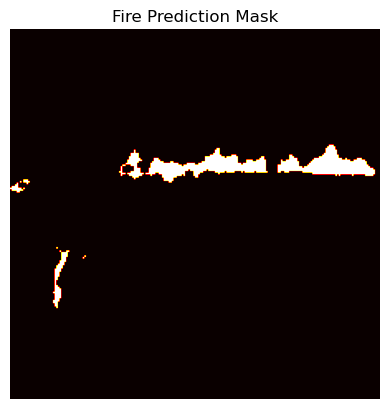

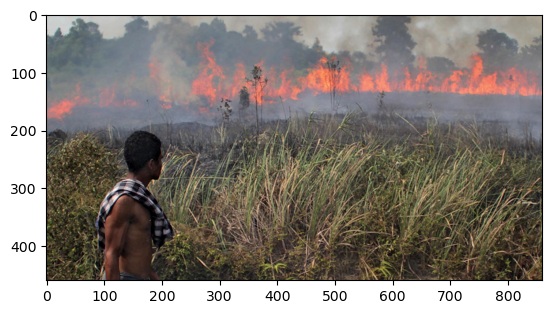

In [9]:
#6 reshape from array to 2D
mask = y_pred.reshape((height, width))
mask = mask.astype('uint8')
mask = closing(mask)

plt.imshow(mask, cmap='hot')
plt.title("Fire Prediction Mask")
plt.axis('off')
plt.show()

mask = mask * 255
cv2.imwrite("test_images/mask.1.png", mask)

rbgImg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rbgImg)
plt.show()

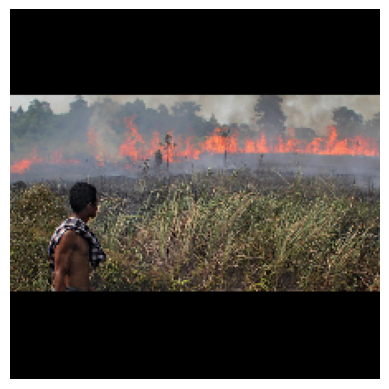

In [14]:
## this

img1= cv2.imread("./test_images/a1.png")
img1 = resize_with_padding(img1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.savefig("./test_images/a1_resized.png")
plt.show()

In [41]:
def plot_images_and_masks(images, masks, titles=None, figsize=(8, 6)):
    """
    Plots 3 BGR images in a row with their corresponding binary masks below.

    Parameters:
        images (list of np.ndarray): List of 3 RGB images (H, W, 3).
        masks (list of np.ndarray): List of 3 binary masks (H, W).
        titles (list of str): Optional list of titles for each image.
        figsize (tuple): Size of the figure.
    """
    assert len(images) == len(masks) == 3, "You must provide exactly 3 images and 3 masks."

    fig, axes = plt.subplots(2, 3, figsize=figsize)

    for i in range(3):
        axes[0, i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axes[0, i].axis("off")
        if titles:
            axes[0, i].set_title(titles[i])

        axes[1, i].imshow(masks[i], cmap='gray')
        axes[1, i].axis("off")
        if titles:
            axes[1, i].set_title(f"Mask ({titles[i]})")

    plt.tight_layout()
    plt.savefig("./test_images/examples_withmask.png")
    plt.show()

In [33]:
img1= cv2.imread("./test_images/d1.png")
#img1=resize_image(img1, size=(224,224))
img1=resize_with_padding(img1)
img2 =cv2.imread("./test_images/e1.png")
img2=resize_with_padding(img2)
img3 = cv2.imread("./test_images/c1.png")
img3=resize_with_padding(img3)
mask1=cv2.imread("./test_images/d2.png")
mask2=cv2.imread("./test_images/e2.png")
mask3 =cv2.imread("./test_images/c2.png")

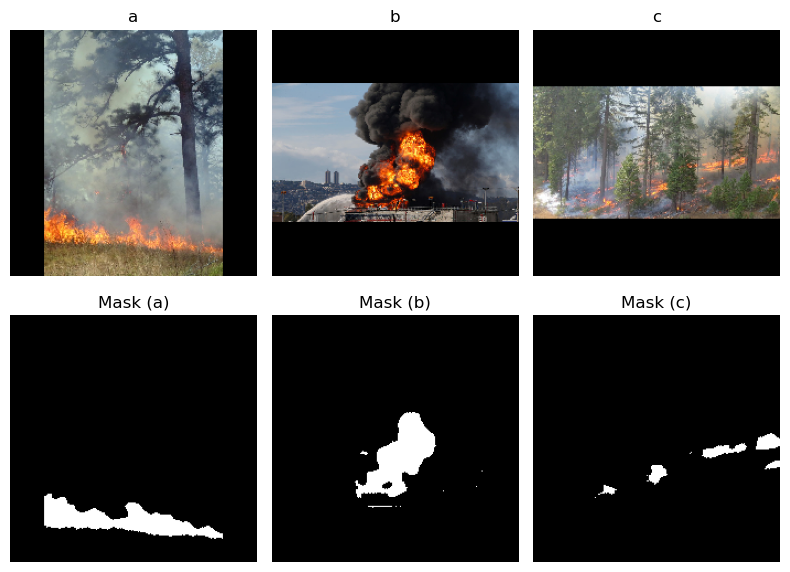

In [42]:
plot_images_and_masks([img1, img2, img3], [mask1, mask2, mask3], titles=['a','b','c'])
